## 1. Introduction


This project analyzes sales data from a retail superstore to identify trends, patterns, and key business insights.
The analysis focuses on sales performance across time, product categories, regions, and customer segments using data visualization and statistical techniques.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

plt.style.use("default")
sns.set(style="whitegrid")

## 2. Dataset Overview


In [2]:
df = pd.read_csv("./train.csv")
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


## 3. Data Understanding


In [3]:
df.shape

(9800, 18)

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

- Shape of dataset: 9,800 rows and 18 columns  
- Data types include numerical (sales) and categorical variables (category, region, segment)  
- Missing values were identified only in the postal_code column  
- Postal codes were treated as categorical identifiers rather than numerical values

## 4. Data Cleaning and Preprocessing


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.columns=(df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
)
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["postal_code"].nunique()

626

In [9]:
df["postal_code"].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

In [10]:
df["postal_code"] = df["postal_code"].astype(str)

df["postal_code"].dtype

dtype('O')

In [11]:
df["postal_code"] = df["postal_code"].replace("nan", "Unknown")

- The postal_code column represents a geographic identifier rather than a numerical measure.
- Although stored as numeric due to missing values, it was converted to a categorical format and missing entries were labeled as “Unknown” to preserve data integrity without affecting sales analysis.

In [12]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

In [13]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst = True)
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst =True)

In [14]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.month_name()

df[["order_year", "order_month", "order_month_name"]].head()

,order_year,order_month,order_month_name
0,2017,11,November
1,2017,11,November
2,2017,6,June
3,2016,10,October
4,2016,10,October


- Additional time-based features were created to support monthly and yearly sales trend analysis.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            9800 non-null   int64         
 1   order_id          9800 non-null   object        
 2   order_date        9800 non-null   datetime64[ns]
 3   ship_date         9800 non-null   datetime64[ns]
 4   ship_mode         9800 non-null   object        
 5   customer_id       9800 non-null   object        
 6   customer_name     9800 non-null   object        
 7   segment           9800 non-null   object        
 8   country           9800 non-null   object        
 9   city              9800 non-null   object        
 10  state             9800 non-null   object        
 11  postal_code       9800 non-null   object        
 12  region            9800 non-null   object        
 13  product_id        9800 non-null   object        
 14  category          9800 n

In [16]:
cols = ['ship_mode','segment', 'country', 'city', 'state',
       'region', 'category', 'sub-category']

In [17]:
for i in cols:
    print(f'\n',df[i].value_counts())


 ship_mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

 segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

 country
United States    9800
Name: count, dtype: int64

 city
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64

 state
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  

In [18]:
df["city"].nunique()

529

Column names were standardized for consistency.
Date columns were converted to datetime format, and new features such as order year and month were extracted.
Missing postal codes were handled appropriately without affecting sales analysis.

## 5. Exploratory Data Analysis (EDA)


In [19]:
# Total Sales

total_sales = df["sales"].sum()
total_sales

np.float64(2261536.7827)

In [20]:
# Average Order Value

avg_order_value = df.groupby("order_id")["sales"].sum().mean()
avg_order_value 

np.float64(459.4751691791955)

In [21]:
# Sales by Category

sales_by_category = df.groupby("category")["sales"].sum()
sales_by_category

category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: sales, dtype: float64

In [22]:
# Sales by Region

sales_by_region = df.groupby("region")["sales"].sum().sort_values(ascending = False).reset_index()
sales_by_region

,region,sales
0,West,710219.6845
1,East,669518.7260
2,Central,492646.9132
3,South,389151.4590


### Monthly Sales Trend – Interpretation

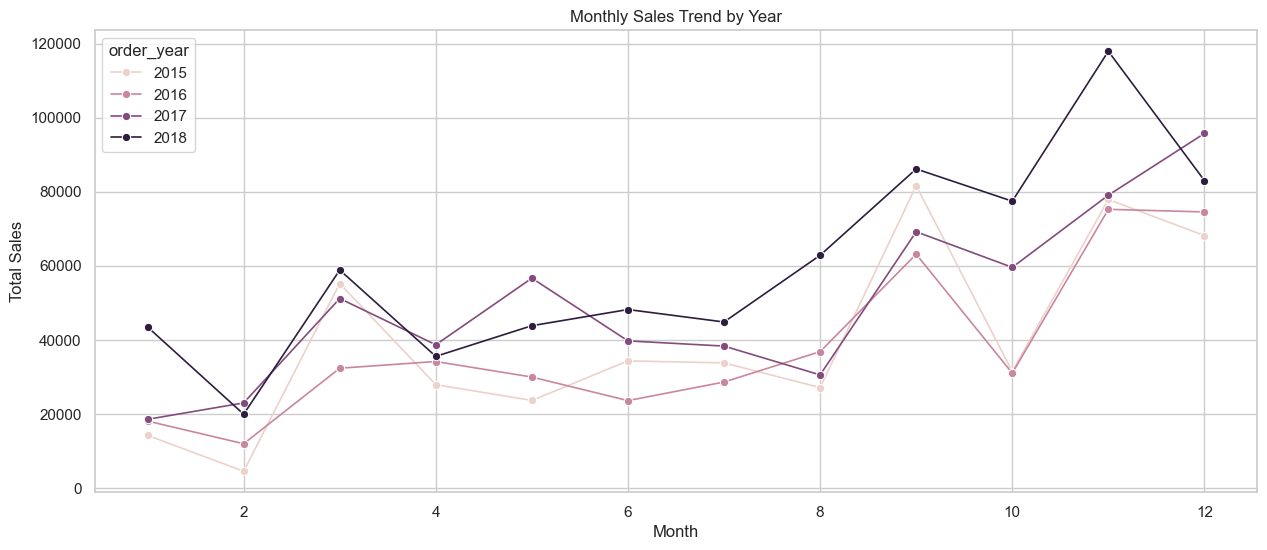

In [23]:
monthly_sales = (df.groupby(["order_year", "order_month"])["sales"].sum().reset_index())

plt.figure(figsize=(15, 6))
sns.lineplot(data = monthly_sales,
            x = "order_month",
            y = "sales",
            linewidth = 1.2,
            hue = "order_year",
            marker = "o")

plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

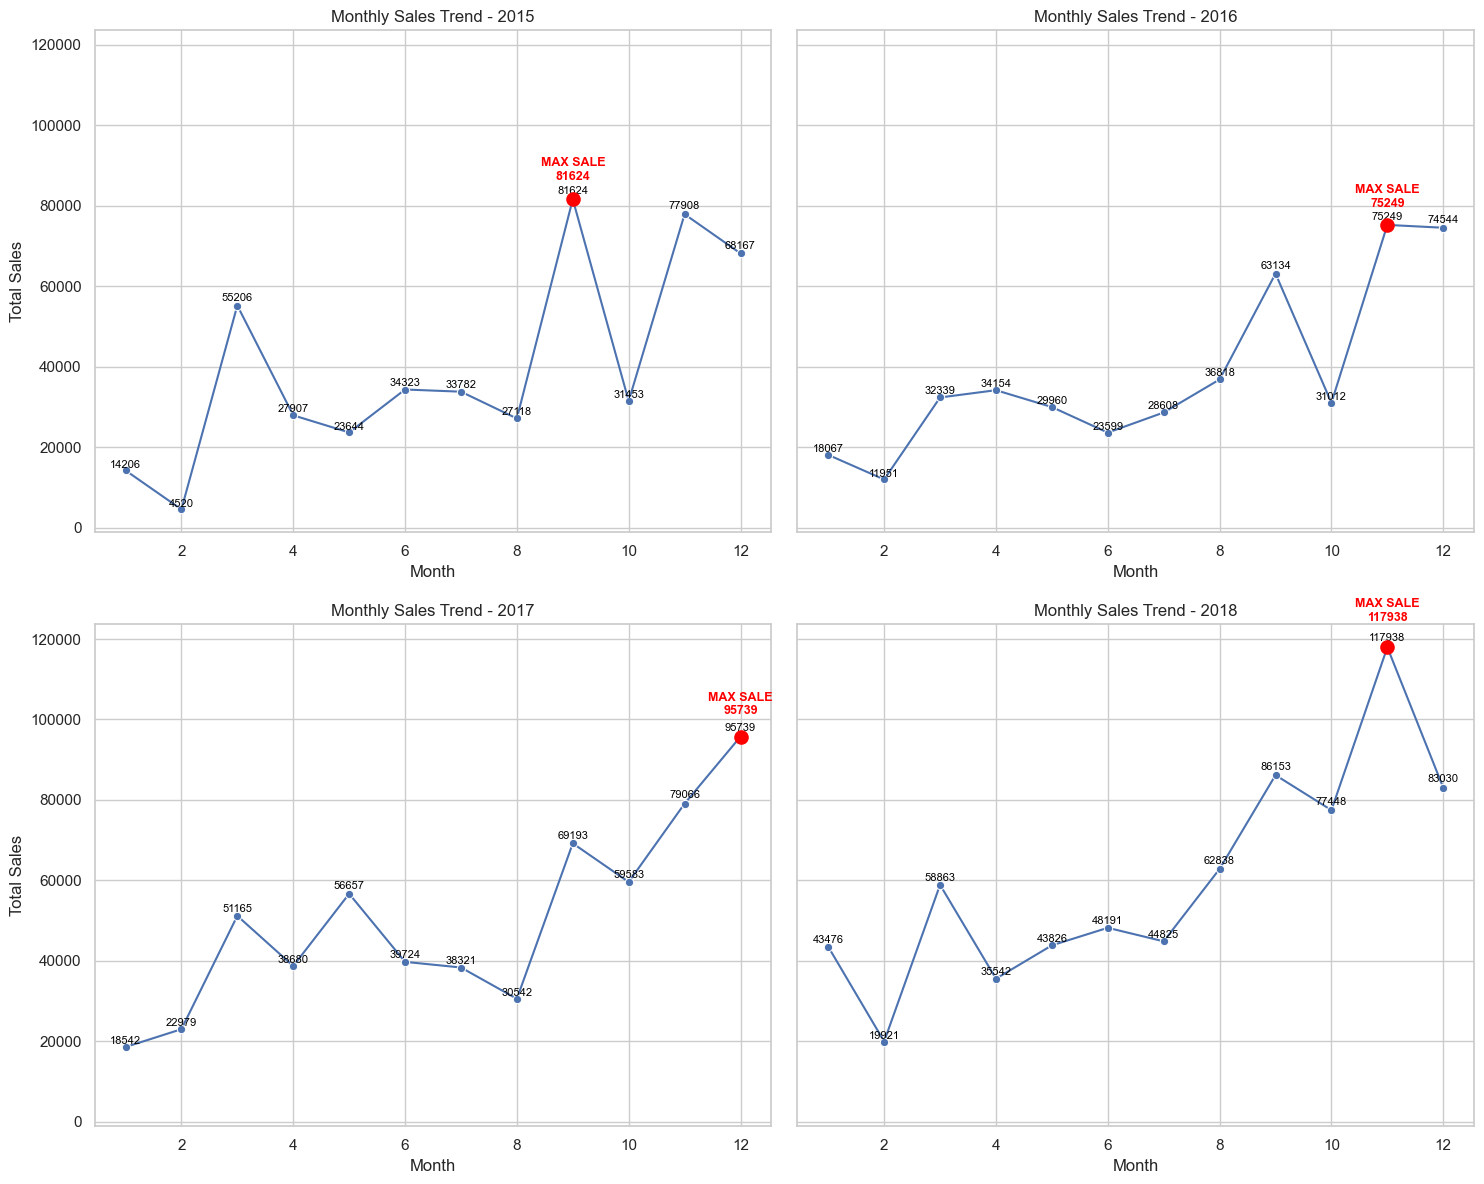

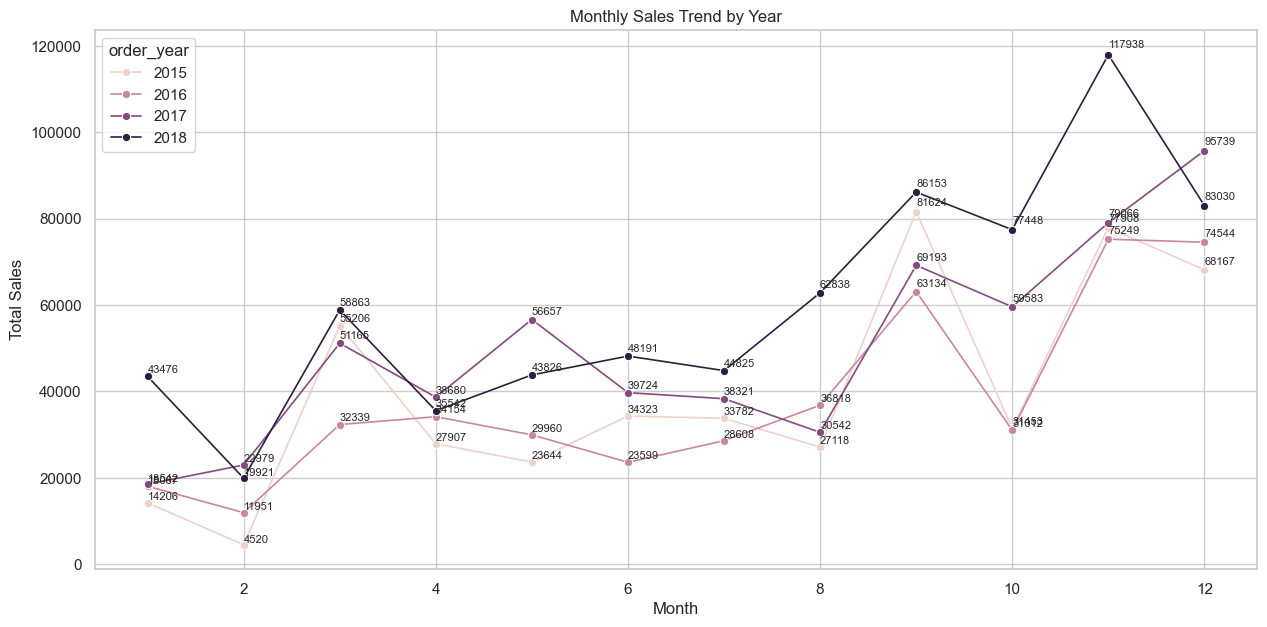

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
axes = axes.flatten()

unique_years = sorted(monthly_sales["order_year"].unique())

for i, year in enumerate(unique_years):
    year_data = monthly_sales[monthly_sales["order_year"] == year]
    ax = axes[i]

    # Line plot
    sns.lineplot(
        data=year_data,
        x="order_month",
        y="sales",
        marker="o",
        linewidth=1.5,
        ax=ax
    )

    # 1️⃣ Label ALL points
    for _, row in year_data.iterrows():
        ax.text(
            row["order_month"],
            row["sales"] * 1.01,
            f"{row['sales']:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black"
        )

    # 2️⃣ Highlight MAX point
    max_row = year_data.loc[year_data["sales"].idxmax()]

    ax.scatter(
        max_row["order_month"],
        max_row["sales"],
        color="red",
        s=90,
        zorder=5
    )

    ax.text(
        max_row["order_month"],
        max_row["sales"] * 1.05,
        f"MAX SALE\n{max_row['sales']:.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="red"
    )

    ax.set_title(f"Monthly Sales Trend - {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Sales")

plt.tight_layout()
plt.show()


# 1 Monthly Sales Trend (MOST IMPORTANT)

monthly_sales = (df.groupby(["order_year", "order_month"])["sales"].sum().reset_index())

plt.figure(figsize=(15, 7))
sns.lineplot(data = monthly_sales,
            x = "order_month",
            y = "sales",
            linewidth = 1.2,
            hue = "order_year",
            marker = "o")

for _, row in monthly_sales.iterrows():
    plt.text(
        row["order_month"],
        row["sales"]* 1.01,
        f"{row['sales']:.0f}",   # format if needed
        ha="left",
        va="bottom",
        fontsize=8
    )
    
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [25]:
year_data.loc[year_data["sales"].idxmax()]

order_year       2018.000
order_month        11.000
sales          117938.155
Name: 46, dtype: float64

When comparing all years together, sales consistently rise during the second half of the year, with most peak values occurring between September and December.

- Sales demonstrate clear seasonality, with stronger performance in the last quarter of each year
- Year-end months consistently record the highest sales across all years
- Overall sales performance improves year over year, indicating business growth
- Promotional periods and festive seasons likely contribute to higher sales volumes

     
“The business shows strong seasonality with consistent sales peaks in the final quarter across all years.”

### Sales Performance by Product Category


In [26]:
# Sales by Category

sales_by_category

category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: sales, dtype: float64

In [27]:
sales_by_category_year = df.groupby(["category", "order_year"])["sales"].sum().reset_index()
sales_by_category_year

,category,order_year,sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


In [28]:
sales_by_category_year[sales_by_category_year["category"] == "Furniture"]

,category,order_year,sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872


In [29]:
unique_catogery = sorted(sales_by_category_year["category"].unique())
unique_catogery[:3]

['Furniture', 'Office Supplies', 'Technology']

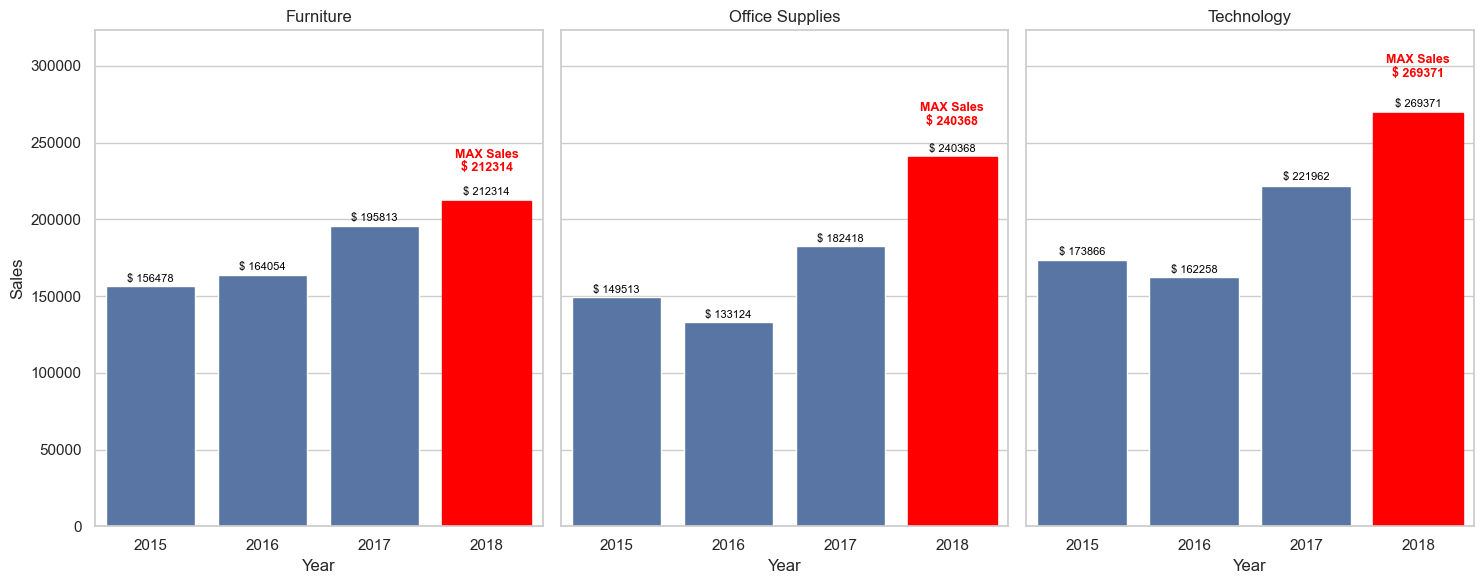

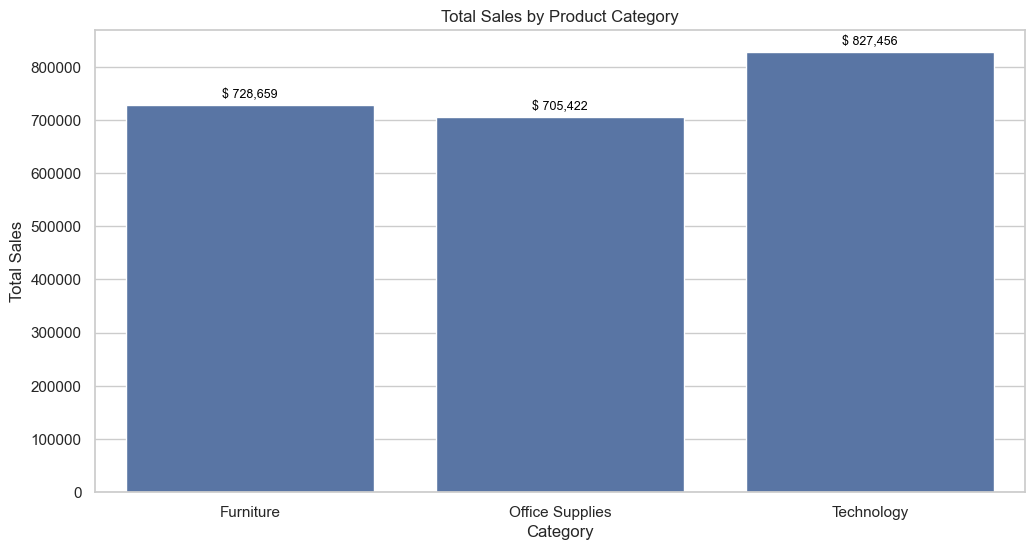

In [30]:
# 2️⃣ Sales by Category
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
axes = axes.flatten()

for i, category in enumerate(unique_catogery[:3]):
    #print(i, category)
    year_data = sales_by_category_year[sales_by_category_year["category"] == category]
    #print(year_data)
    ax = axes[i]
    
    sns.barplot(data = year_data, x = "order_year", y = "sales", ax=ax)
    y_max = year_data["sales"].max()
    ax.set_ylim(0, y_max * 1.2)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 1.01,
            f"$ {height:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black"
        )

    # 🔥 Highlight the max bar
    max_bar = max(ax.patches, key=lambda b: b.get_height())

    max_bar.set_color("red")

    ax.text(
        max_bar.get_x() + max_bar.get_width() / 2,
        max_bar.get_height() * 1.08,
        f"MAX Sales\n$ {max_bar.get_height():.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="red"
    )
    
        
    ax.set_title(f"{category}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.show()



# plt.figure(figsize=(12,6))
# sns.barplot(
#     x=sales_by_category.index,
#     y=sales_by_category.values
# )

# plt.title("Total Sales by Product Category")
# plt.xlabel("Category")
# plt.ylabel("Total Sales")
# plt.show()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=sales_by_category.index,
    y=sales_by_category.values
)

# Add value labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"$ {height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

# Add headroom so labels are visible
#ax.set_ylim(0, max(sales_by_category.values) * 1.15)

plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

The bar charts illustrate total annual sales for each product category across different years, followed by an overall comparison of total sales by category.

The combined bar chart shows that Technology generates the highest total sales overall, followed by Furniture, while Office Supplies contribute comparatively lower sales.

- Technology is the top-performing product category in terms of total sales
- All categories show an upward sales trend, indicating overall business growth
- Sales across categories peak in 2018, reflecting strong market performance
- Technology products likely drive a significant portion of total revenue

“Technology is the highest revenue-generating category, showing consistent growth across all years.”

### Sales Analysis by Product Sub-Category


In [31]:
sales_by_subcat = df.groupby("sub-category")["sales"].sum().sort_values(ascending=False).reset_index()
sales_by_subcat

,sub-category,sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


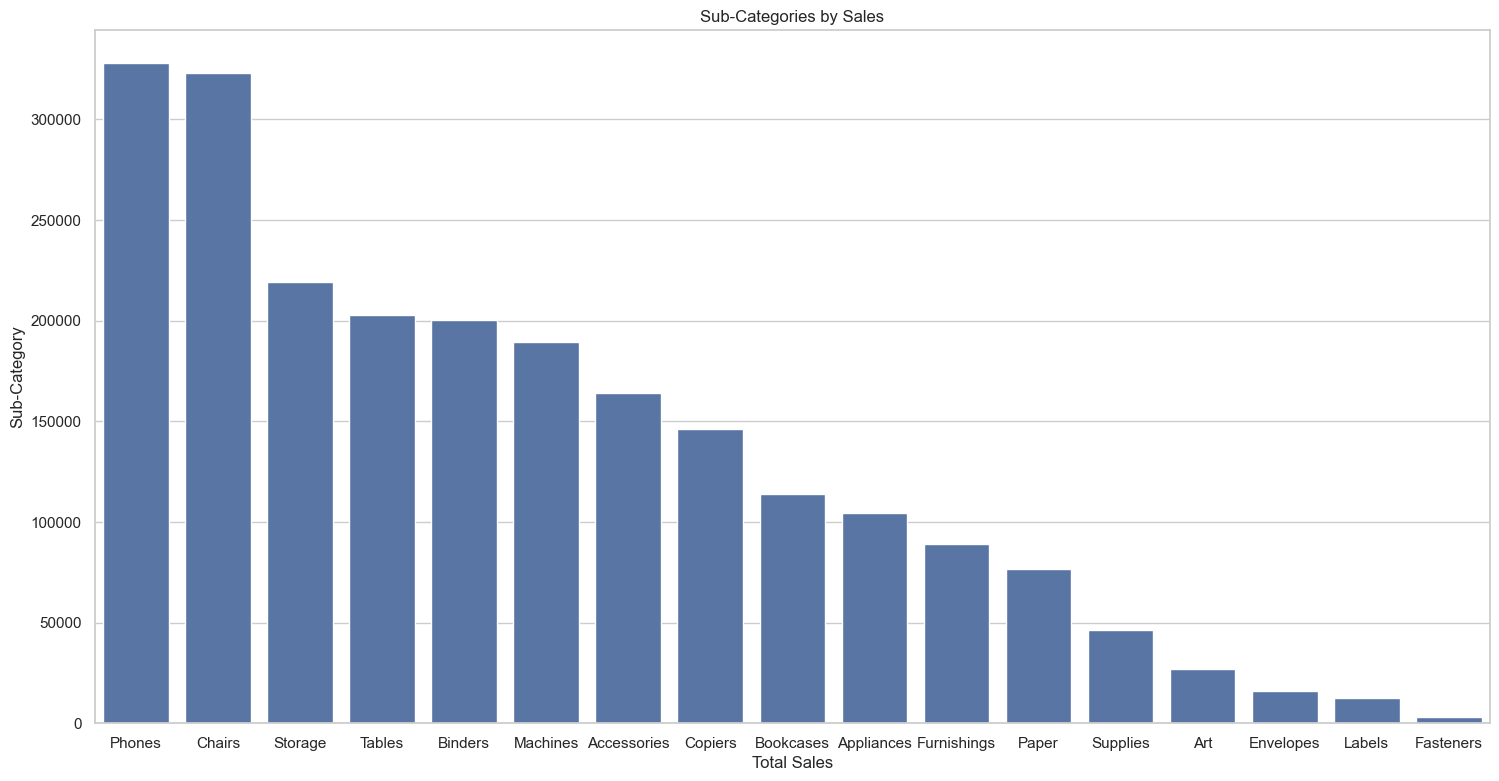

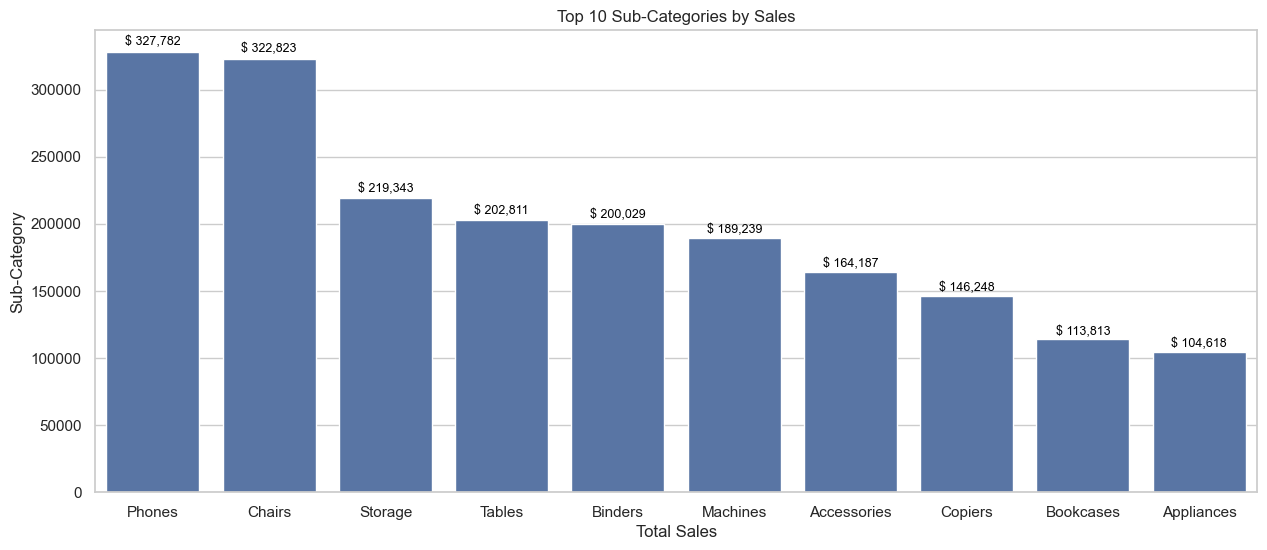

In [32]:
plt.figure(figsize=(18,9))
sns.barplot(
    x=sales_by_subcat["sub-category"],
    y=sales_by_subcat["sales"]
)

plt.title("Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()

sales_by_subca_top10 = df.groupby("sub-category")["sales"].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15,6))
ax = sns.barplot(
        x=sales_by_subca_top10["sub-category"],
        y=sales_by_subca_top10["sales"]
)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"$ {height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )
    
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()

- This visualization highlights the top-selling sub-categories, helping businesses focus on high-revenue product lines.

In [33]:
sales_by_subcat_top5 = sales_by_subcat.head()
top5 = sorted(sales_by_subcat_top5["sub-category"])
top5

['Binders', 'Chairs', 'Phones', 'Storage', 'Tables']

In [34]:
subcat_year = df.groupby(["sub-category", "order_year"])["sales"].sum().reset_index()
subcat_year

,sub-category,order_year,sales
0,Accessories,2015,23766.3960
1,Accessories,2016,40443.9700
2,Accessories,2017,41735.3640
3,Accessories,2018,58240.9700
4,Appliances,2015,15160.7150
...,...,...,...
63,Supplies,2018,15952.1100
64,Tables,2015,45757.7775
65,Tables,2016,35397.1955
66,Tables,2017,60762.1125


In [35]:
subcat_year_top5 = subcat_year[subcat_year['sub-category'].isin(top5)].reset_index(drop = True)
subcat_year_top5

,sub-category,order_year,sales
0,Binders,2015,43263.2670
1,Binders,2016,36049.7460
2,Binders,2017,48994.5170
3,Binders,2018,71721.2550
4,Chairs,2015,77046.4400
5,Chairs,2016,70654.6730
6,Chairs,2017,81930.3450
7,Chairs,2018,93191.2730
8,Phones,2015,77225.9560
9,Phones,2016,67870.6140


In [36]:
subcat_year_top5_by_year = subcat_year_top5.sort_values(["order_year"]).reset_index(drop = True)
subcat_year_top5_by_year

,sub-category,order_year,sales
0,Binders,2015,43263.2670
1,Tables,2015,45757.7775
2,Chairs,2015,77046.4400
3,Storage,2015,49197.5260
4,Phones,2015,77225.9560
5,Tables,2016,35397.1955
6,Storage,2016,43321.2080
7,Phones,2016,67870.6140
8,Chairs,2016,70654.6730
9,Binders,2016,36049.7460


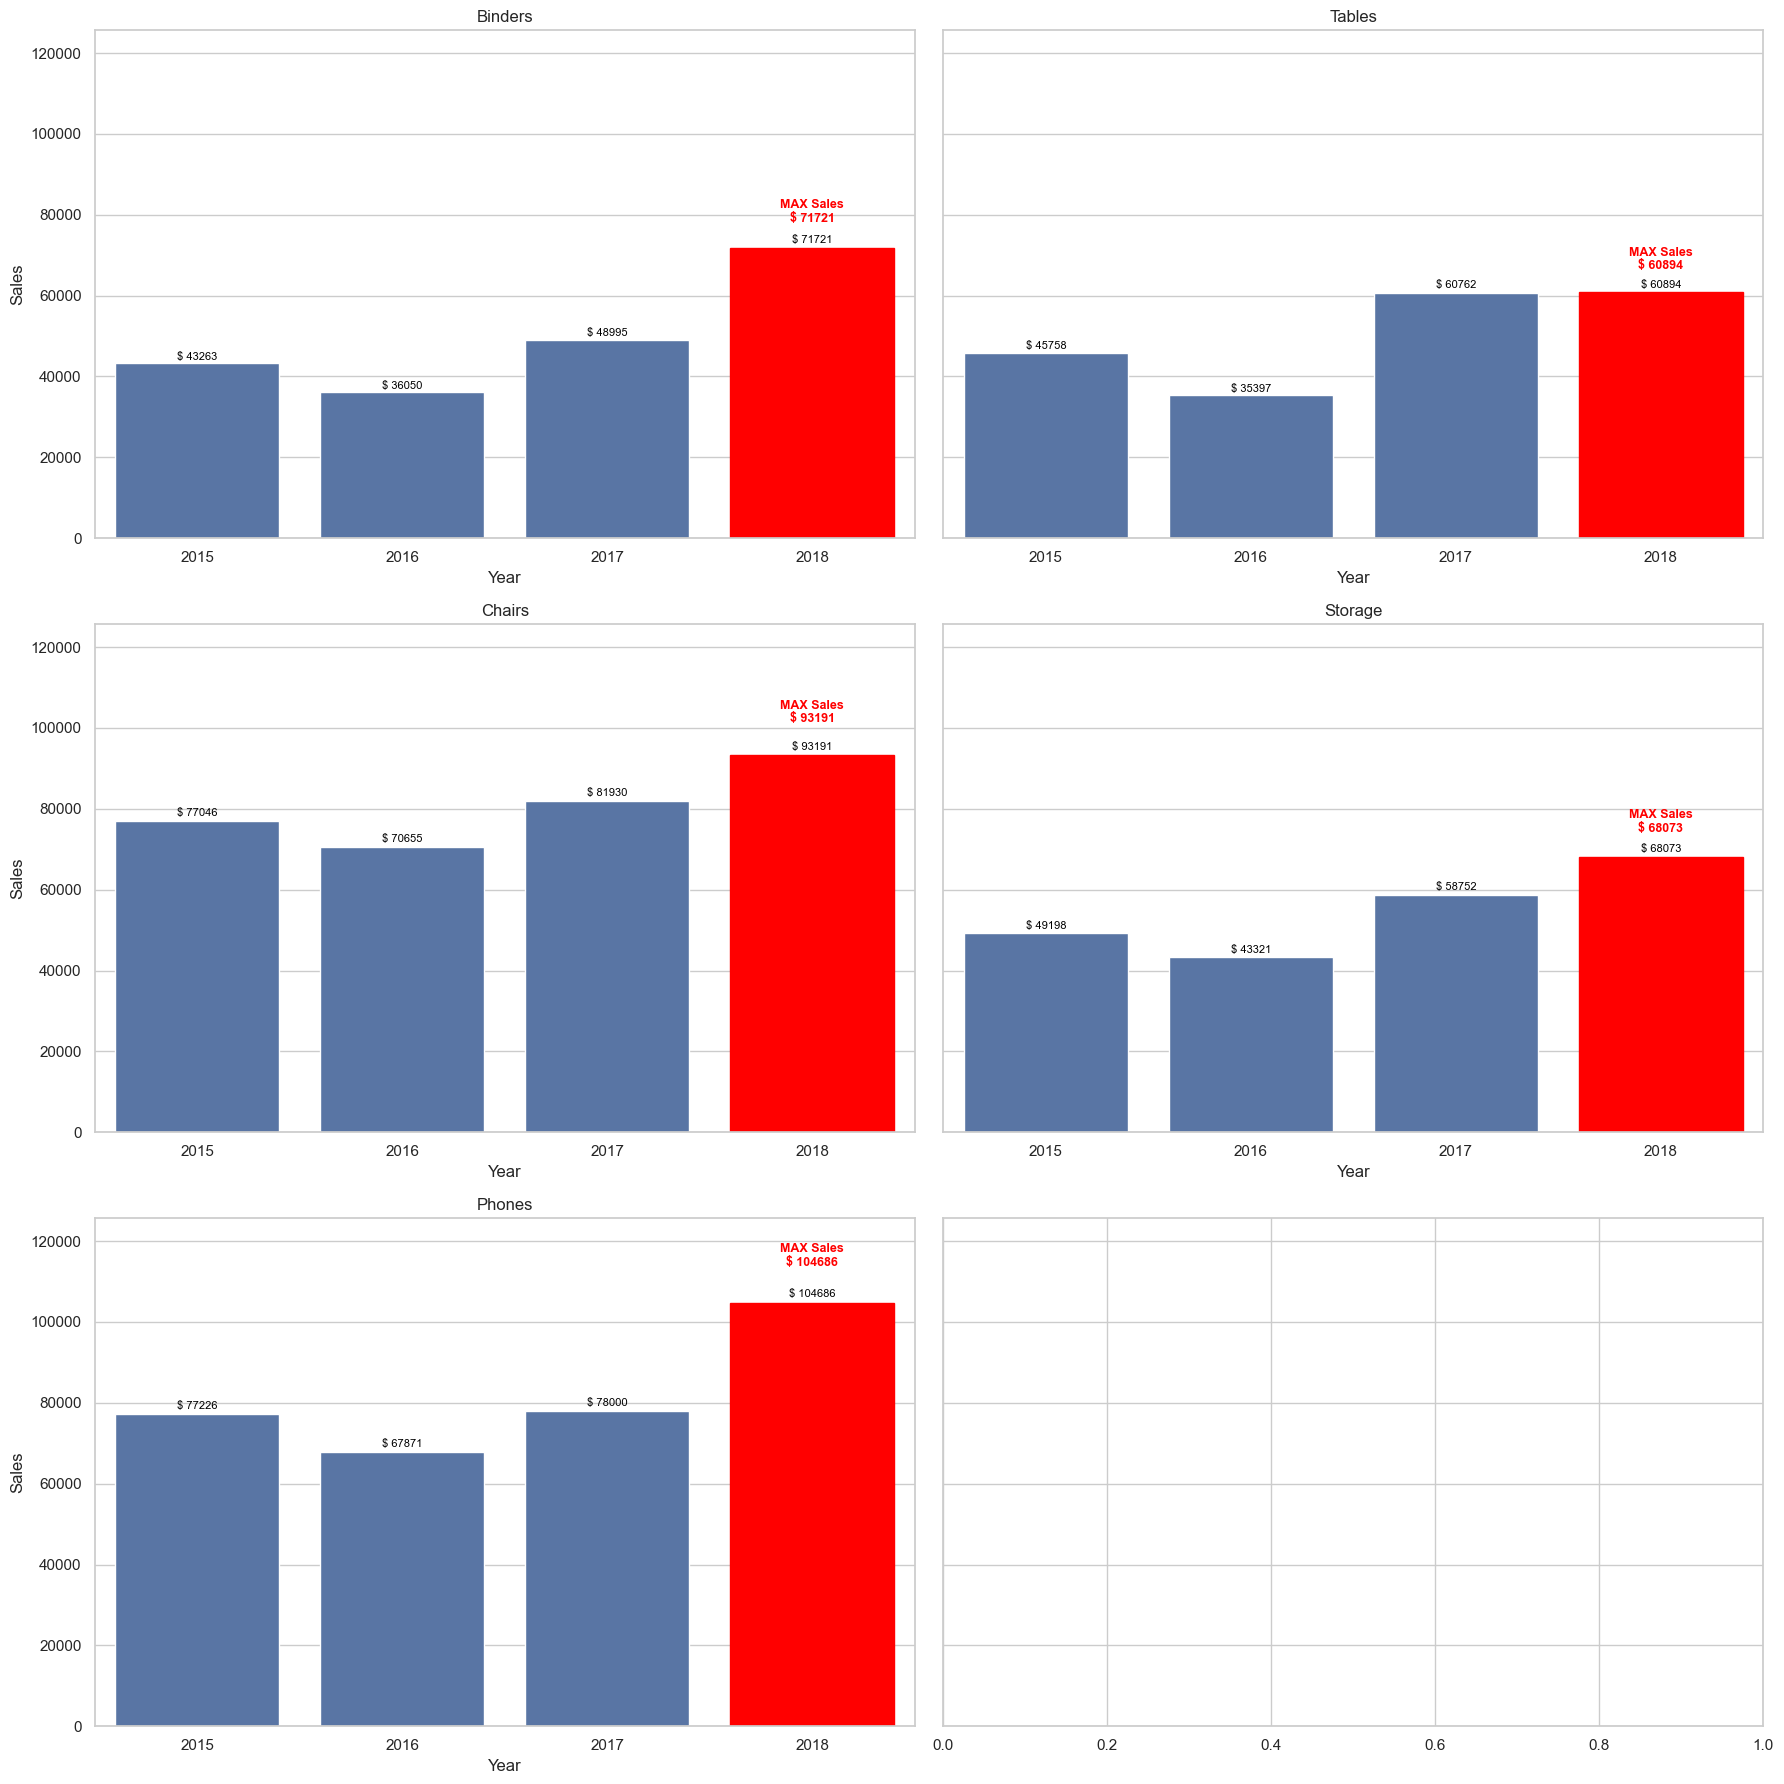

In [37]:
unique_subcats = subcat_year_top5_by_year["sub-category"].unique()

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True)
axes = axes.flatten()

for i, sub_cat in enumerate(unique_subcats):
    #print(i, category)
    year_data = subcat_year_top5_by_year[subcat_year_top5_by_year["sub-category"] == sub_cat]
    #print(year_data)
    ax = axes[i]
    
    sns.barplot(data = year_data, x = "order_year", y = "sales", ax=ax)
    y_max = year_data["sales"].max()
    ax.set_ylim(0, y_max * 1.2)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 1.01,
            f"$ {height:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black"
        )

    # 🔥 Highlight the max bar
    max_bar = max(ax.patches, key=lambda b: b.get_height())

    max_bar.set_color("red")

    ax.text(
        max_bar.get_x() + max_bar.get_width() / 2,
        max_bar.get_height() * 1.08,
        f"MAX Sales\n$ {max_bar.get_height():.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="red"
    )
    
        
    ax.set_title(f"{sub_cat}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.show()

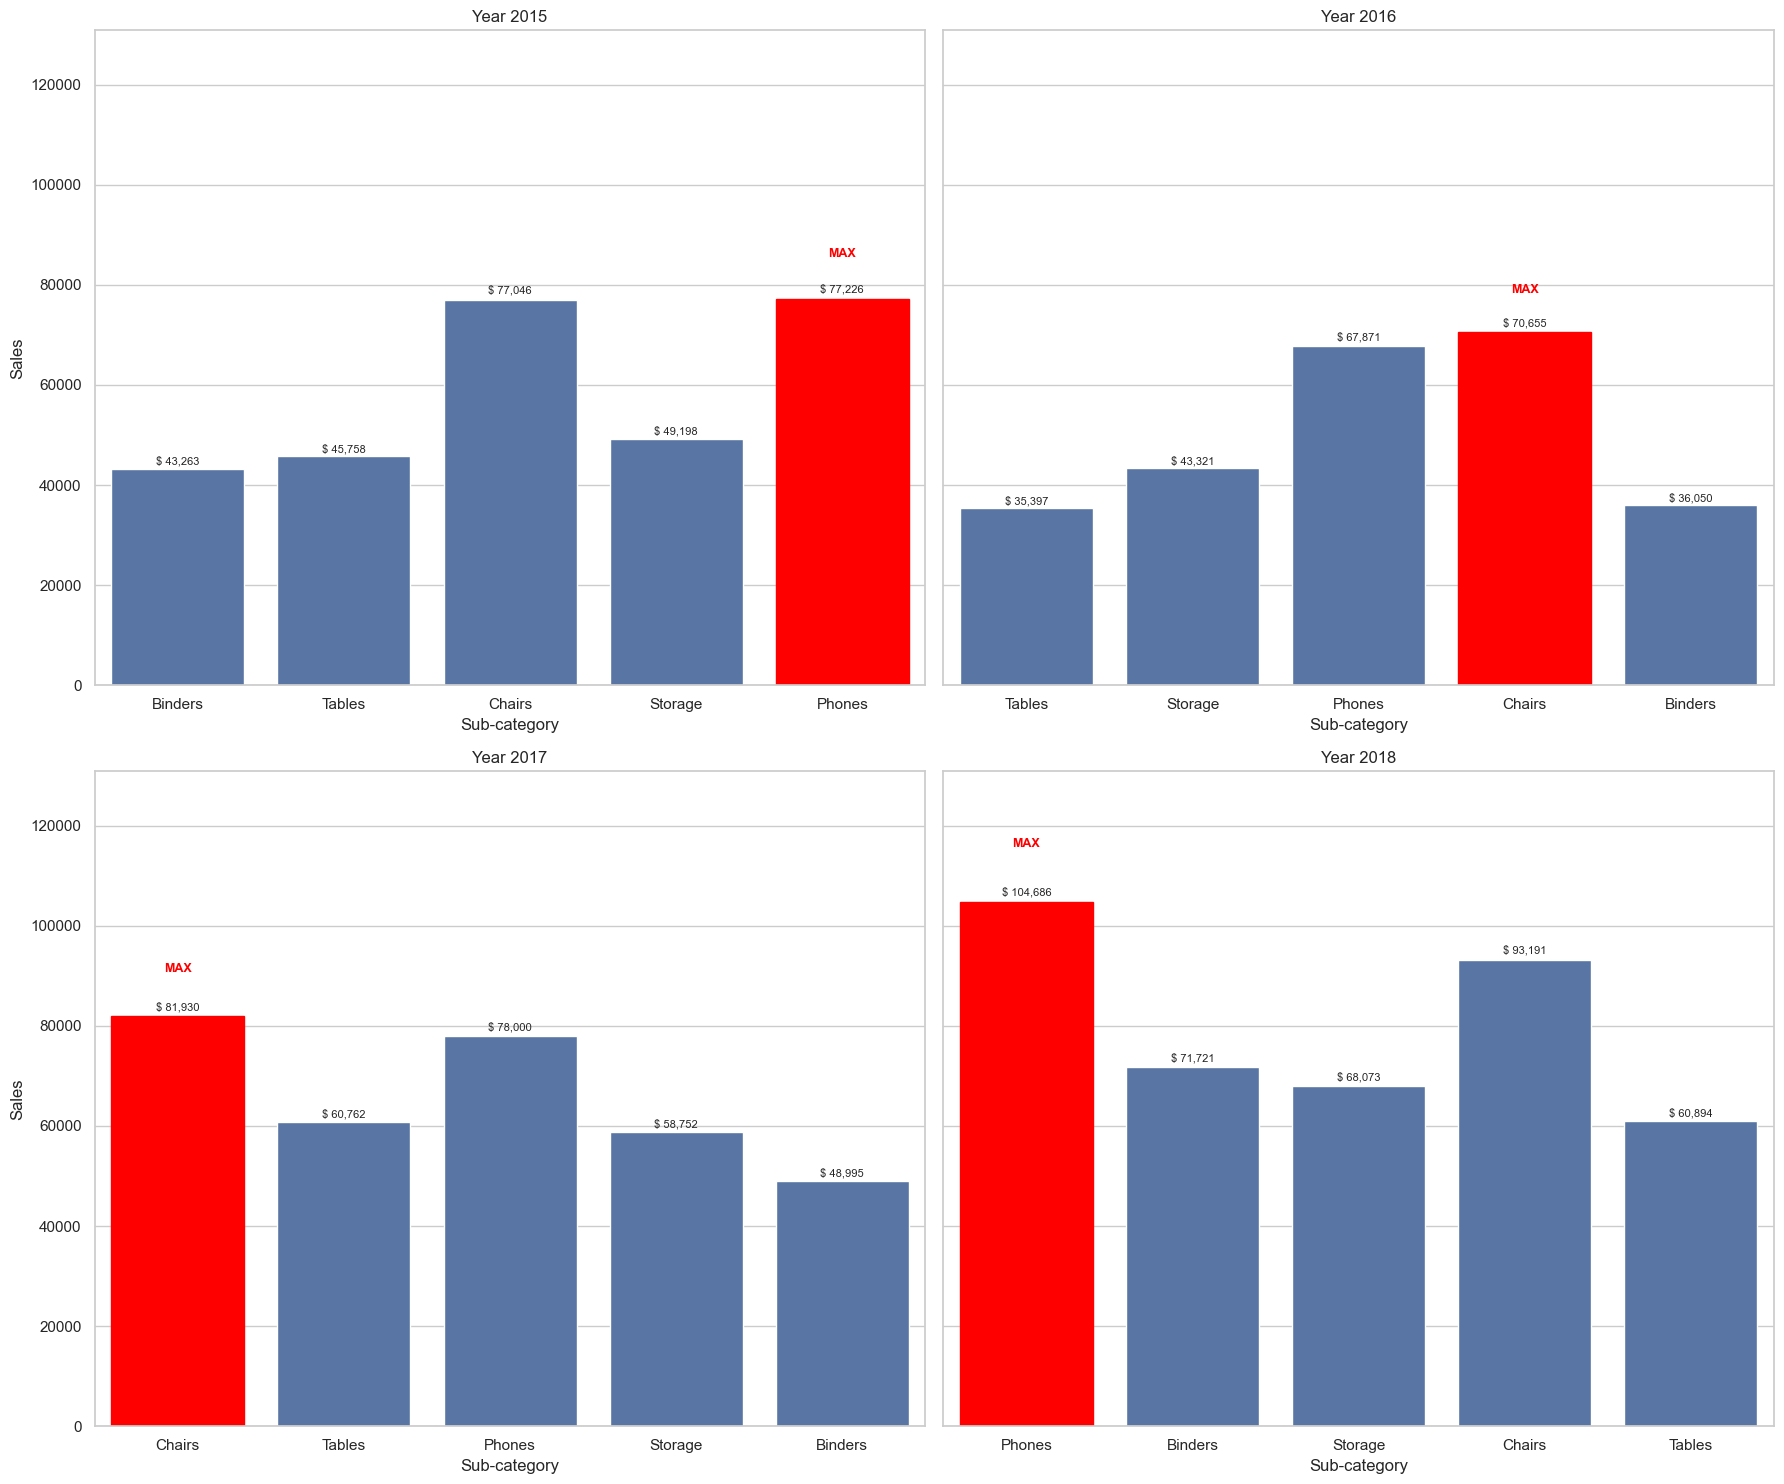

In [38]:
years = subcat_year_top5_by_year["order_year"].unique()

fig, axes = plt.subplots(2, 2, figsize=(18, 15), sharey=True)
axes = axes.flatten()

for i, year in enumerate(years):
    year_data = subcat_year_top5_by_year[subcat_year_top5_by_year["order_year"] == year]
    ax = axes[i]
    
    sns.barplot(
        data=year_data,
        x="sub-category",
        y="sales",
        ax=ax)
    
    y_max = year_data["sales"].max()
    ax.set_ylim(0, y_max * 1.25)
    
    # value labels
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 1.01,
            f"$ {height:,.0f}",
            ha="center",
            va="bottom",
            fontsize=8
        )
    
    # highlight max bar
    max_bar = max(ax.patches, key=lambda b: b.get_height())
    max_bar.set_color("red")
    
    ax.text(
        max_bar.get_x() + max_bar.get_width() / 2,
        max_bar.get_height() * 1.1,
        "MAX",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="red"
    )
    
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Sub-category")
    ax.set_ylabel("Sales")
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

- Sales are concentrated in a few high-performing sub-categories
- Phones consistently generate the highest revenue across years
- Chairs and Storage show stable and growing sales trends
- Low-performing sub-categories may require strategic review or optimization
- Revenue growth is primarily driven by a limited set of product lines

“Sales are heavily concentrated in a few sub-categories, with Phones consistently leading revenue across all years.”

### Regional Sales Performance Analysis


In [39]:
sales_by_region.reset_index()

,index,region,sales
0,0,West,710219.6845
1,1,East,669518.7260
2,2,Central,492646.9132
3,3,South,389151.4590


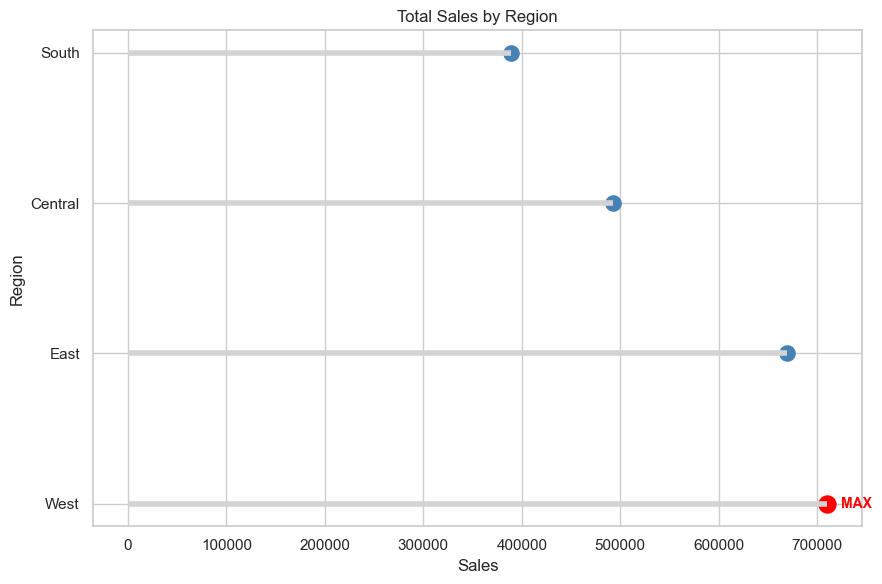

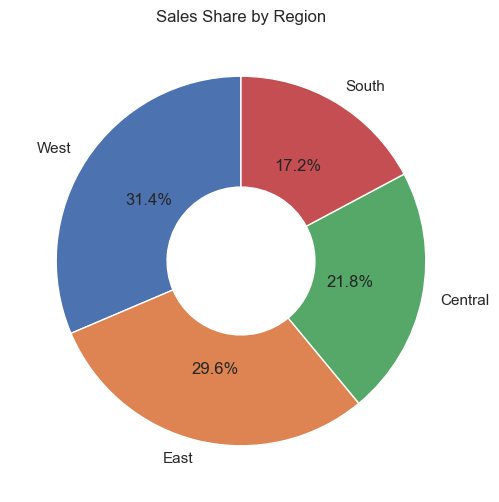

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_region = sales_by_region.sort_values("sales", ascending=False)

plt.figure(figsize=(9, 6))

plt.hlines(
    y=sales_by_region["region"],
    xmin=0,
    xmax=sales_by_region["sales"],
    color="lightgray",
    linewidth=4
)

plt.scatter(
    sales_by_region["sales"],
    sales_by_region["region"],
    color="steelblue",
    s=120
)

# highlight max
max_row = sales_by_region.iloc[0]
plt.scatter(
    max_row["sales"],
    max_row["region"],
    color="red",
    s=150
)

plt.text(
    max_row["sales"] * 1.02,
    max_row["region"],
    "MAX",
    va="center",
    fontsize=10,
    fontweight="bold",
    color="red"
)

plt.xlabel("Sales")
plt.ylabel("Region")
plt.title("Total Sales by Region")
plt.tight_layout()
plt.show()


plt.figure(figsize=(9, 6))

plt.pie(
    sales_by_region["sales"],
    labels=sales_by_region["region"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.6)
)

plt.title("Sales Share by Region")
plt.show()


**This chart compares total sales across different regions, providing a high-level view of regional revenue contribution & This donut chart shows the percentage contribution of each region to overall sales.**

- West region records the highest total sales
- East follows closely as the second-highest contributor
- Central and South regions contribute comparatively lower sales

In [41]:
sales_by_state_and_region = df.groupby(["region","state"])["sales"].sum().sort_values(ascending = False).reset_index()
sales_by_state_and_region

,region,state,sales
0,West,California,446306.4635
1,East,New York,306361.1470
2,Central,Texas,168572.5322
3,West,Washington,135206.8500
4,East,Pennsylvania,116276.6500
5,South,Florida,88436.5320
6,Central,Illinois,79236.5170
7,Central,Michigan,76136.0740
8,East,Ohio,75130.3500
9,South,Virginia,70636.7200


In [42]:
sales_by_state_and_region[sales_by_state_and_region["region"] == "Central"].reset_index(drop = True)

,region,state,sales
0,Central,Texas,168572.5322
1,Central,Illinois,79236.5170
2,Central,Michigan,76136.0740
3,Central,Indiana,48718.4000
4,Central,Wisconsin,31173.4300
5,Central,Minnesota,29863.1500
6,Central,Missouri,22205.1500
7,Central,Oklahoma,19683.3900
8,Central,Nebraska,7464.9300
9,Central,Iowa,4443.5600


In [43]:
sales_by_state_and_region[sales_by_state_and_region["region"] == "West"].reset_index(drop = True)

,region,state,sales
0,West,California,446306.4635
1,West,Washington,135206.8500
2,West,Arizona,35272.6570
3,West,Colorado,31841.5980
4,West,Oregon,17284.4620
5,West,Nevada,16729.1020
6,West,Utah,11220.0560
7,West,Montana,5589.3520
8,West,New Mexico,4783.5220
9,West,Idaho,4382.4860


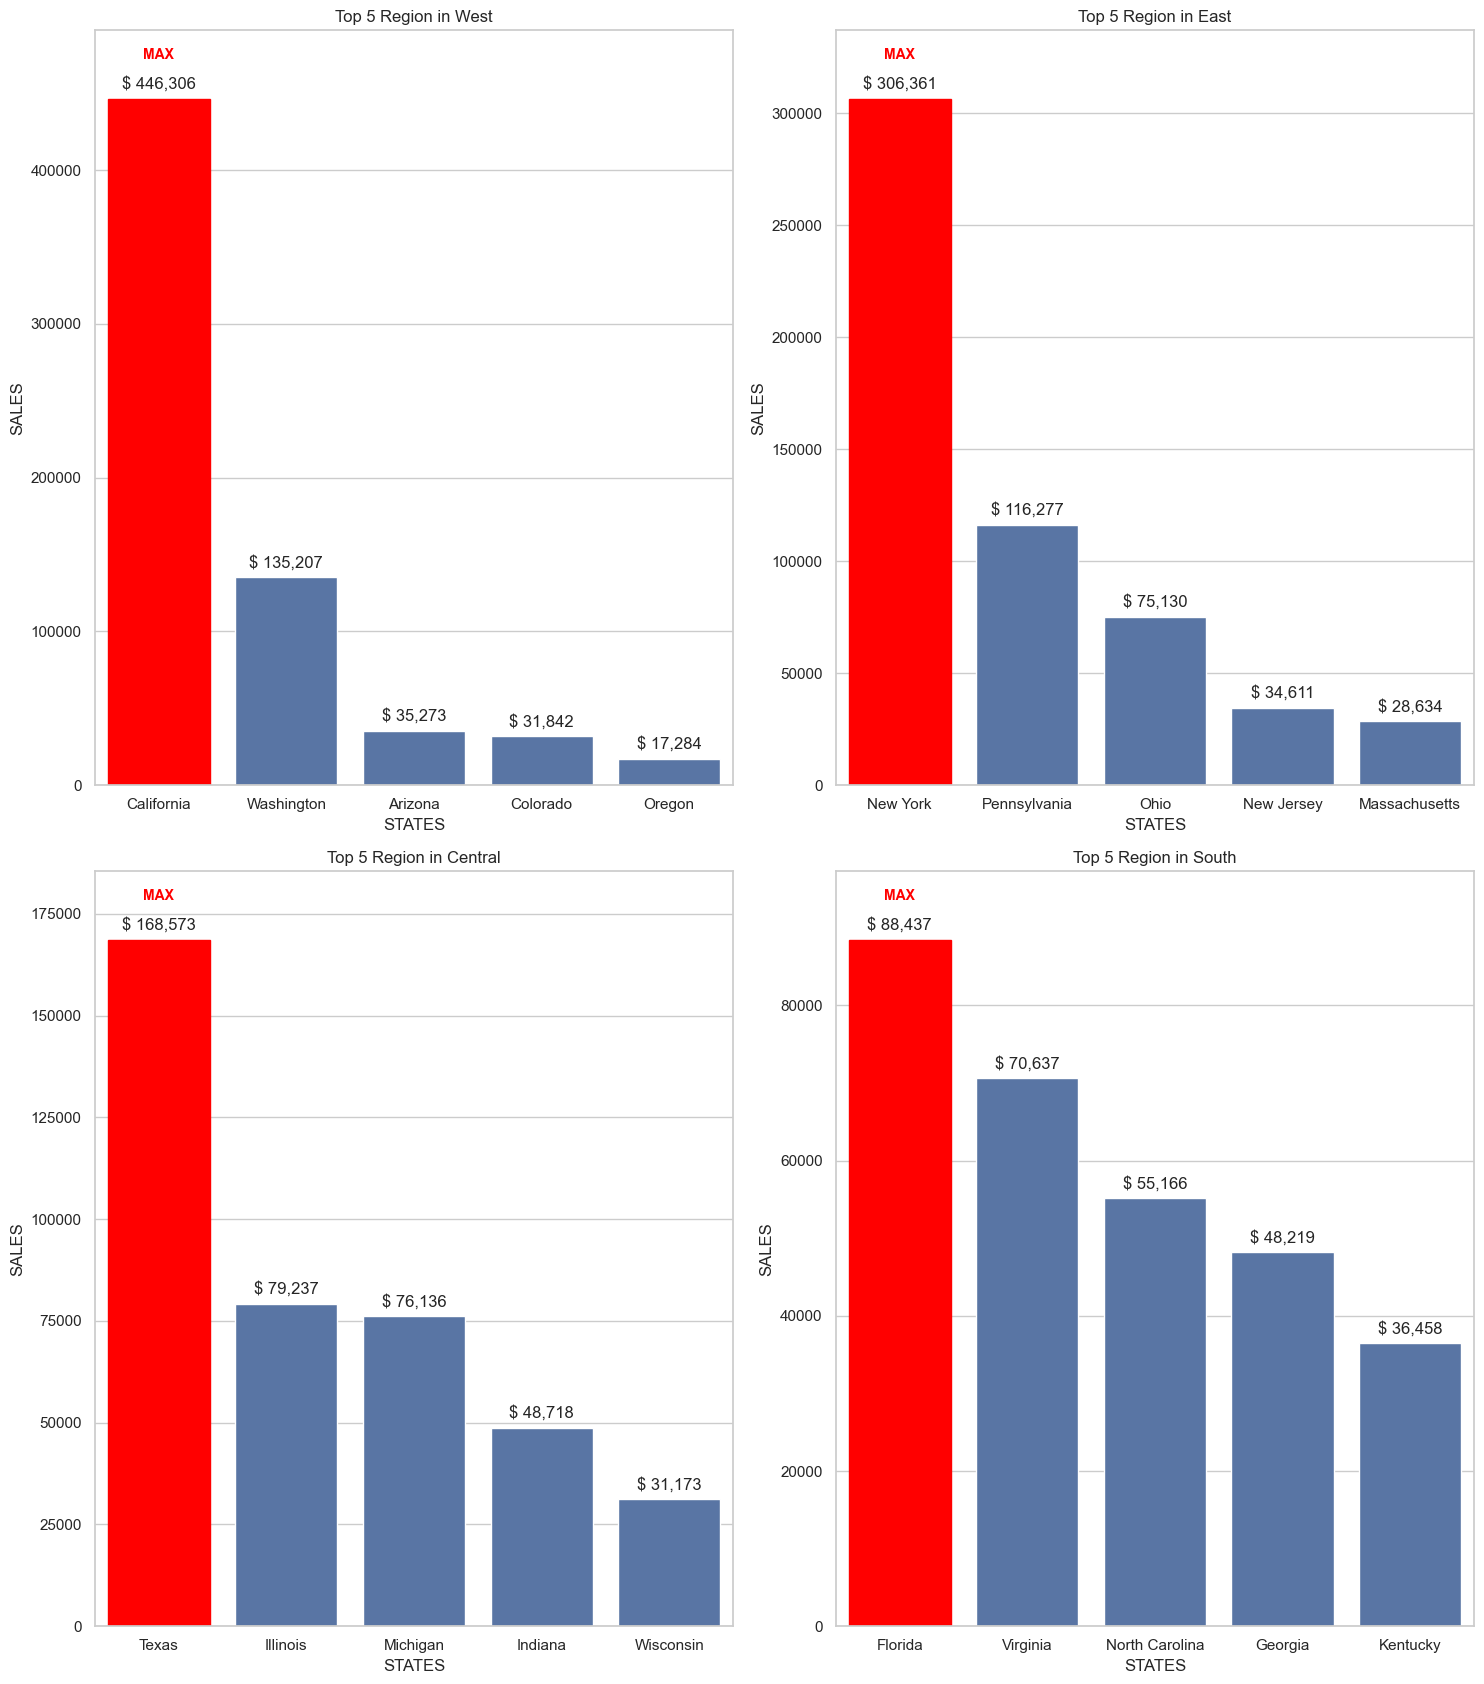

In [44]:
un_region = sales_by_state_and_region["region"].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 17), sharey=False)
axes = axes.flatten()

for i, reg in enumerate(un_region):
    reg_data = sales_by_state_and_region[sales_by_state_and_region["region"] == reg].head()
    ax = axes[i]
    
    sns.barplot(
        data=reg_data,
        x="state",
        y="sales",
        ax=ax
    )
    
    y_max = reg_data["sales"].max()
    ax.set_ylim(0, y_max * 1.1)   # modest headroom
    
    # value labels (pixel offset)
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f"$ {height:,.0f}",
            (bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),                # 🔥 5 pixels above bar
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=12
        )
    
    # highlight max bar
    max_bar = max(ax.patches, key=lambda b: b.get_height())
    max_bar.set_color("red")
    
    ax.annotate(
        "MAX",
        (max_bar.get_x() + max_bar.get_width() / 2, max_bar.get_height()*1.03),
        xytext=(0, 12),                  # 🔥 12 pixels above bar
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="red"
    )
    
    ax.set_title(f"Top 5 Region in {reg}")
    ax.set_xlabel("STATES")
    ax.set_ylabel("SALES")
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()


- Sales performance varies significantly across regions
- West region is the primary revenue driver, led by California
- East region contributes a substantial portion of total sales
- Individual states strongly influence regional performance
- Regional-level insights can support targeted marketing and logistics strategies

**“Sales are regionally concentrated, with the West region—particularly California—driving the highest revenue.”**

### Sales Performance by Customer Segment


In [45]:
# Sales by Customer Segment

sales_by_segment = df.groupby("segment")["sales"].sum()
sales_by_segment

segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: sales, dtype: float64

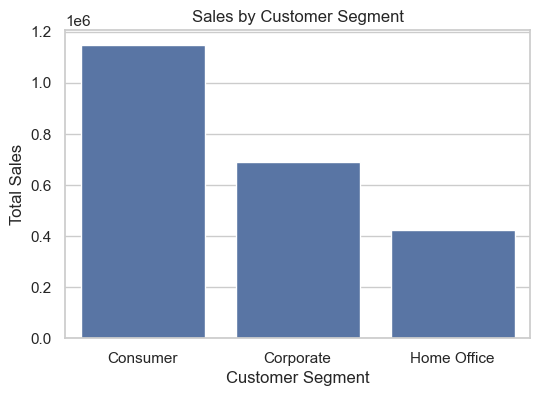

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=sales_by_segment.index,
    y=sales_by_segment.values
)

plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.show()

**This bar chart compares total sales generated by different customer segments, providing an overview of their contribution to overall revenue.**
- Consumer segment generates the highest total sales
- Corporate segment is the second-largest contributor
- Home Office contributes comparatively lower sales

In [47]:
sales_by_segment_year = df.groupby(["segment", "order_year"])["sales"].sum().reset_index()
sales_by_segment_year

,segment,order_year,sales
0,Consumer,2015,262956.8006
1,Consumer,2016,265356.2933
2,Consumer,2017,291142.9652
3,Consumer,2018,328604.4719
4,Corporate,2015,127797.4957
5,Corporate,2016,119675.5989
6,Corporate,2017,204977.3178
7,Corporate,2018,236043.6624
8,Home Office,2015,89101.9118
9,Home Office,2016,74404.1132


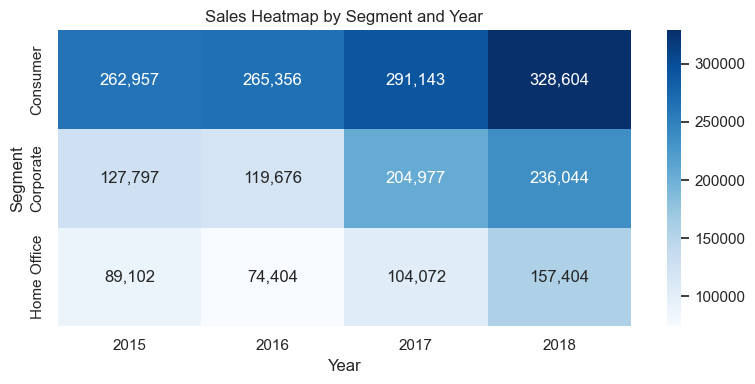

In [48]:
import seaborn as sns

pivot_df = sales_by_segment_year.pivot(
    index="segment",
    columns="order_year",
    values="sales"
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=",.0f",
    cmap="Blues"
)

plt.title("Sales Heatmap by Segment and Year")
plt.xlabel("Year")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()


**The heatmap visualizes sales performance across customer segments over multiple years, highlighting growth patterns and intensity of sales.**
- Consumer segment shows consistent growth year over year
- Corporate segment experiences significant growth after 2016
- Home Office shows gradual improvement, especially in later years

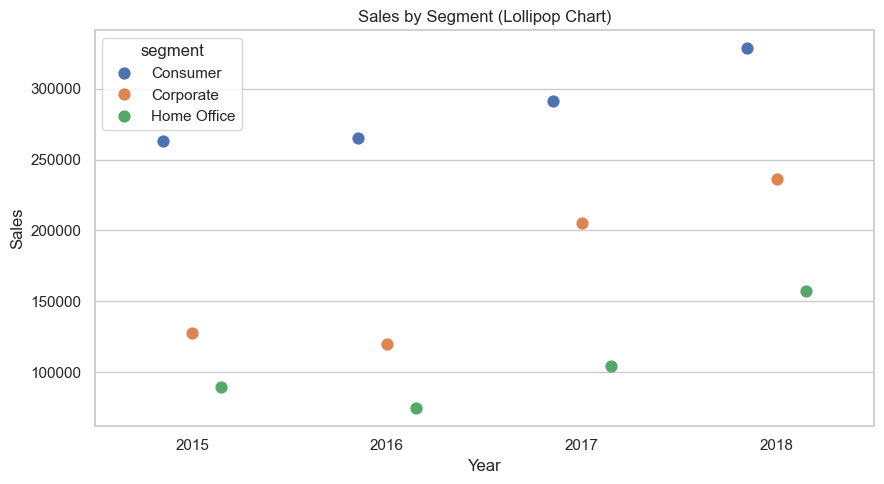

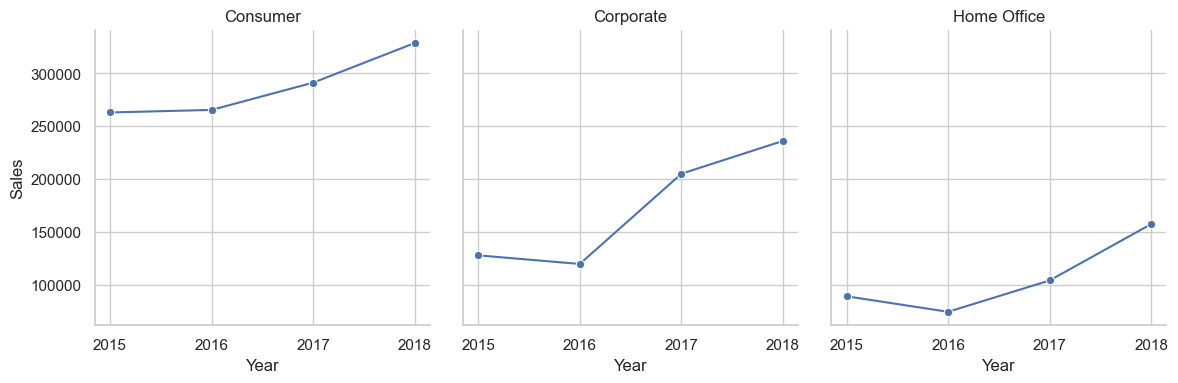

In [49]:
plt.figure(figsize=(9, 5))

sns.pointplot(
    data=sales_by_segment_year,
    x="order_year",
    y="sales",
    hue="segment",
    dodge=0.3,
    markers="o",
    linestyles=""
)

plt.title("Sales by Segment (Lollipop Chart)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


g = sns.FacetGrid(
    sales_by_segment_year,
    col="segment",
    height=4,
    aspect=1
)

g.map_dataframe(sns.lineplot, x="order_year", y="sales", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Sales")

for ax in g.axes.flat:
    ax.set_xticks(years)

plt.show()


**This lollipop chart highlights year-wise sales performance for each customer segment, allowing easy comparison across segments and years & These line charts display sales trends over time for each customer segment, highlighting growth patterns and fluctuations.**
- Consumer segment is the primary revenue driver
- Corporate segment shows strong growth potential
- Home Office segment contributes less but demonstrates consistent improvement
- Segment-level analysis can support targeted sales and marketing strategies

“Consumer customers contribute the highest sales, while Corporate and Home Office segments show consistent growth over time.”

### Sales Contribution by Customer Segment and Product Category


In [50]:
scos = df.groupby(["segment", "category", "order_year"])["sales"].sum().reset_index()
scos

,segment,category,order_year,sales
0,Consumer,Furniture,2015,85745.2936
1,Consumer,Furniture,2016,93633.2363
2,Consumer,Furniture,2017,98717.3422
3,Consumer,Furniture,2018,109600.3859
4,Consumer,Office Supplies,2015,82641.6480
5,Consumer,Office Supplies,2016,79548.8400
6,Consumer,Office Supplies,2017,85650.8270
7,Consumer,Office Supplies,2018,111511.2930
8,Consumer,Technology,2015,94569.8590
9,Consumer,Technology,2016,92174.2170


In [51]:
pivot = (
    scos
    .pivot_table(
        index=["segment", "order_year"],
        columns="category",
        values="sales",
        aggfunc="sum"
    )
    .sort_index()
)

In [52]:
pivot 

category                  Furniture  Office Supplies  Technology
segment     order_year                                          
Consumer    2015         85745.2936        82641.648   94569.859
            2016         93633.2363        79548.840   92174.217
            2017         98717.3422        85650.827  106774.796
            2018        109600.3859       111511.293  107492.793
Corporate   2015         45031.5707        48743.081   34022.844
            2016         40656.8739        31430.765   47587.960
            2017         75862.0528        53923.293   75191.972
            2018         58771.2044        90033.397   87239.061
Home Office 2015         25701.0168        18128.091   45272.804
            2016         29763.7572        22144.802   22495.554
            2017         21233.6450        42843.446   39995.176
            2018         43942.1969        38822.851   74638.837

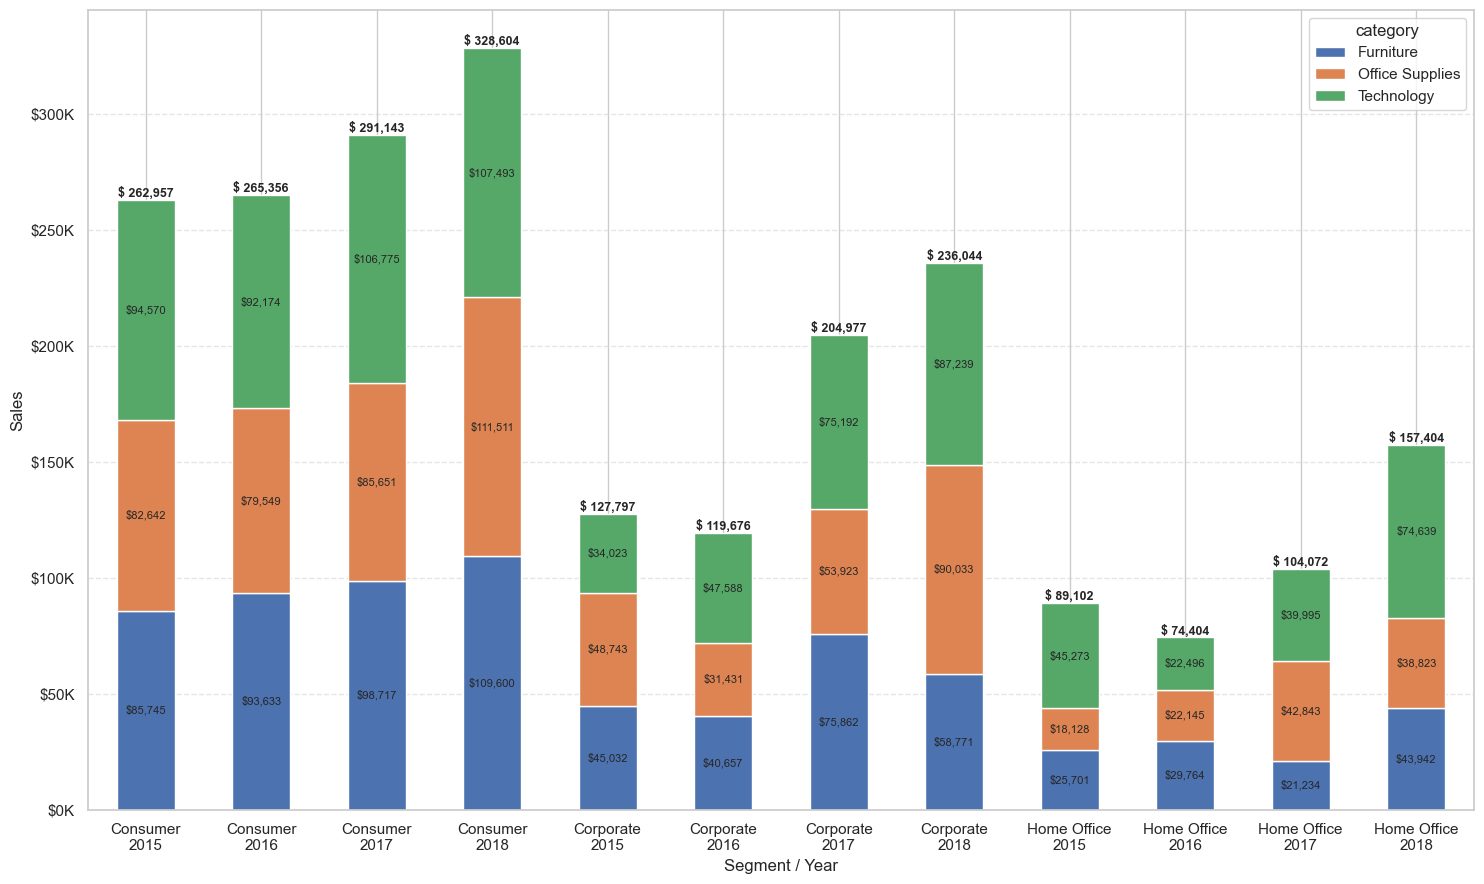

In [53]:
import matplotlib.pyplot as plt

ax = pivot.plot(kind="bar", stacked=True, figsize=(15,9))

for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        #fmt="%.0f",        # no decimals
        fmt="${:,.0f}",
        fontsize=8
    )


totals = pivot.sum(axis=1)

for i, total in enumerate(totals):
    ax.text(
        i,
        total,
        f"$ {total:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.ylabel("Sales")
plt.xlabel("Segment / Year")

# Clean x-axis labels
ax.set_xticklabels(
    [f"{seg}\n{year}" for seg, year in pivot.index],
    rotation=0
)

# Format Y-axis as $K
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"${int(x/1000)}K")
)

# Grid + layout
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**This stacked bar chart illustrates how total sales for each customer segment are distributed across different product categories over multiple years.**

- Technology is the dominant category across all customer segments
- Consumer segment drives the majority of revenue across categories
- Corporate segment shows strong year-over-year growth potential
- Home Office segment, while smaller, demonstrates consistent improvement
- Segment-category interaction highlights where targeted strategies can be applied


## Conclusion and Key Takeaways


### Conclusion

This project performed an exploratory data analysis of retail superstore sales data to uncover trends, patterns, and key business insights.  
Through visual analysis, sales performance was evaluated across time, product categories, sub-categories, regions, and customer segments.

The analysis revealed that sales exhibit clear seasonality, with stronger performance in later months of the year.  
Technology emerged as the highest revenue-generating category across all customer segments, while the Consumer segment consistently contributed the largest share of total sales.  
Regional analysis highlighted the West region as the top-performing market, driven primarily by high sales in California.

Overall, the project demonstrates how exploratory data analysis and visualization can support data-driven decision-making in retail businesses.

### Future Scope

- Perform statistical hypothesis testing to validate observed trends  
- Analyze profitability by incorporating profit and discount metrics  
- Build predictive models to forecast future sales trends  
- Create interactive dashboards using tools such as Power BI or Tableau

This project showcases practical data analysis and visualization skills using real-world retail sales data.  
Delivered actionable business insights using exploratory data analysis and visualization techniques.
